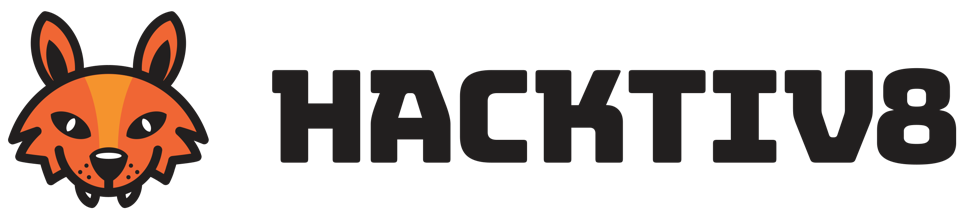

# FINAL PROJECT 3 : ENSEMBLE

## Introduction

### Members 

1. Citra Puspa Tria
2. Fadhilah Gustriandini
3. Nabilla Yolanda Paramitha

### Abstract

### Data

Dataset yang digunakan pada project ini didapat dari website Kaggle (https://www.kaggle.com/andrewmvd/heart-failure-clinical-data) mengenai prediksi keselamatan pasien dari penyakit jantung. Data ini memiliki 13 atribut

Berikut disajikan kieteramgan dari setiap atribut :
1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up


### Objective
Final Project 3 ini dibuat guna mengevaluasi konsep Ensemble sebagai berikut:
- Mampu memahami konsep Classification dengan Ensemble Model
- Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
- Mampu mengimplementasikan Ensemble Model untuk membuat prediksi

## Import Libraries

In [1]:
!pip install -U imbalanced-learn

In [2]:
# Library for Dataframe
import pandas as pd
import numpy as np
import pandas_profiling

# Library for visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Library for analysis
import scipy
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import pickle
from sklearn.preprocessing import LabelEncoder

# Me-non aktifkan peringatan pada python
import warnings
warnings.filterwarnings('ignore')

# Style Text
bold = '\033[1m'
normal = '\033[0m'

## Data Loading

### Import Dataset

In [3]:
# Dilakukan load dataset menggunakan pandas
data = pd.read_csv(r"~/datasets/heart_failure_clinical_records_dataset.csv")
pd.set_option("display.max.columns", None)

In [4]:
# Akan dilihat 10 baris teratas dari dataset menggunakan fungsi head()
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [5]:
# Akan dilihat 10 baris terbawah dari dataset menggunakan fungsi tail()
data.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,90.0,1,337,0,38,0,390000.0,0.9,144,0,0,256,0
290,45.0,0,615,1,55,0,222000.0,0.8,141,0,0,257,0
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


### Type of Data

In [6]:
# menggunakan metode info() untuk mendapatkan informasi dasar tentang kerangka data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Dalam dataset tersebut, fitur-fitur berupa data numerik dan kategorik.  Fitur dengan data numerik adalah age, creatinine_phosphokinase, ejection_fraction, platelets, serum creatinine, serum_sodium, dan time.\
Sedangkan, untuk fitur dengan data kategorik adalah anaemia, diabetes, high_blood_pressure, sex, smoking, dan DEATH_EVENT.\
Berikut penamaan label pada fitur kategorikal :
- anaemia
0: Tidak, 1: Iya
- diabetes
0: Tidak, 1: Iya
- high_blood_pressure
0: Tidak, 1: Iya
- sex
0: Perempuan, 1: Laki-laki
- smoking
0: Tidak, 1: Iya
- DEATH_EVENT
0: Tidak meninggal saat masa follow up, 1: Sudah meninggal saat follow up

### List of Columns

In [7]:
# menggunakan parameter .columns.values untuk mendapatkan list header kolom
data.columns.values

array(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'], dtype=object)

In [8]:
data.rename(columns={'age':'Usia',
                     'anaemia':'Anemia',
                     'creatinine_phosphokinase':'KadarCPK',
                     'diabetes':'Diabetes',
                     'ejection_fraction':'FraksiEjeksi',
                     'high_blood_pressure':'Hipertensi',
                     'platelets':'Trombosit',
                     'serum_creatinine':'KreatininSerum',
                     'serum_sodium':'SodiumSerum',
                     'sex':'Gender',
                     'smoking':'Perokok',
                     'time':'Hari',
                     'DEATH_EVENT':'Kematian'
                    }, inplace=True)

### Index

In [9]:
# Menggunakan parameter .index untuk mendapatkan daftar indeks
data.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

### Number of Rows and Columns

In [10]:
# Menggunakan parameter .shape untuk mengetahui jumlah baris dan kolom pada dataset
data.shape

(299, 13)

Dataset ini memiliki baris yang berjumlah 299 dan kolom yang berjumlah 13

In [11]:
# Menghitung jumlah nilai unik pada setiap kolom
data.nunique()

Usia               47
Anemia              2
KadarCPK          208
Diabetes            2
FraksiEjeksi       17
Hipertensi          2
Trombosit         176
KreatininSerum     40
SodiumSerum        27
Gender              2
Perokok             2
Hari              148
Kematian            2
dtype: int64

### Duplicated Value

In [12]:
data.duplicated().sum()

0

Dari hasil pengecekan <i>duplicated values</i> diperoleh hasil, yaitu tidak ada data duplikat dalam dataset

### Missing Values

In [13]:
# Memeriksa apakah terdapat missing value pada dataset
data.isna().sum()

Usia              0
Anemia            0
KadarCPK          0
Diabetes          0
FraksiEjeksi      0
Hipertensi        0
Trombosit         0
KreatininSerum    0
SodiumSerum       0
Gender            0
Perokok           0
Hari              0
Kematian          0
dtype: int64

Dari hasil pengecekan <i>missing values</i> diperoleh hasil, yaitu tidak ada missing values untuk setiap atribut dalam dataset

### Invalid Data

In [14]:
for col in data.columns:
    print(col, ': ')
    print(data[col].unique())
    print('\n','#'*60,'\n')

Usia : 
[75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]

 ############################################################ 

Anemia : 
[0 1]

 ############################################################ 

KadarCPK : 
[ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 108

Dari hasil pengecekan di atas, diperoleh hasil, yaitu tidak ada invalid data untuk setiap atribut dalam dataset

## Data Exploration

### Descriptive Statistics

In [15]:
# Membuat dataframe baru : data_copy
data_copy = data.copy()

# Menunjukkan 5 data teratas
data_copy.head()

,Usia,Anemia,KadarCPK,Diabetes,FraksiEjeksi,Hipertensi,Trombosit,KreatininSerum,SodiumSerum,Gender,Perokok,Hari,Kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [16]:
data_copy.describe()

,Usia,Anemia,KadarCPK,Diabetes,FraksiEjeksi,Hipertensi,Trombosit,KreatininSerum,SodiumSerum,Gender,Perokok,Hari,Kematian
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<b> Kesimpulan  </b>

Dari perolehan statistika deskriptif untuk data numerik di atas, dapat diambil informasi sebagai berikut:
1.  Pasien penyakit jantung berusia di kisaran 40 hingga 95 tahun, dengan rata-rata usia 60 tahun.
2.  Kadar enzim kreatin fosfokinase pasien pengidap penyakit jantung berkisar antara 23 hingga 7861 mcg/L dengan rata-rata 581.8 mcg/L.
3.  Fraksi ejeksi minimal berada di angka 14% dan maksimal di angka 80% dengan rata-rata 38%.
4.  Rata-rata trombosit pasien penyakit jantung adalah 263358 kiloplatelets/mL.
5.  Rata-rata kreatinin serum adalah 1.39 mg/dL.
6.  Rata-rata sodium serum adalah 136.6 mEq/L.

In [17]:
# Melihat statistika deskriptif dari data menggunakan fungsi describe()
data_copy.astype('category').describe()

,Usia,Anemia,KadarCPK,Diabetes,FraksiEjeksi,Hipertensi,Trombosit,KreatininSerum,SodiumSerum,Gender,Perokok,Hari,Kematian
count,299.0,299,299,299,299,299,299.00,299.0,299,299,299,299,299
unique,47.0,2,208,2,17,2,176.00,40.0,27,2,2,148,2
top,60.0,0,582,0,35,0,263358.03,1.0,136,1,0,250,0
freq,33.0,170,47,174,49,194,25.00,50.0,40,194,203,7,203


In [18]:
data_copy[data_copy['Kematian']==0].shape

(203, 13)

<b> Kesimpulan  </b>

Dari perolehan statistika deskriptif untuk data kategorik di atas, dapat diambil informasi sebagai berikut:
1.  Hampir 50% pasien penyakit jantung juga mengidap anemia, diabetes, maupun hipertensi.
2.  Pasien penyakit jantung juga kebanyakan tidak merokok.  Bahkan, jumlah pasien yang tidak merokok mencapai 203 pasien.

### Visualizing Data

#### Kematian Berdasarkan Usia

In [19]:
# membuat dataframe yang berisi data pasien meninggal dan tidak meninggal berdasarkan usia
yes=pd.DataFrame(data_copy[data_copy['Kematian']==1].groupby(['Usia'])['Usia'].count())
yes.rename(columns={'Usia':'Meninggal'}, inplace=True)
no=pd.DataFrame(data_copy[data_copy['Kematian']==0].groupby(['Usia'])['Usia'].count())
no.rename(columns={'Usia':'Tidak_Meninggal'}, inplace=True)
data_usia=pd.concat([yes,no], axis=1).reset_index()
data_usia=data_usia.sort_values(by=['Usia']).reset_index(drop=True)
data_usia

,Usia,Meninggal,Tidak_Meninggal
0,40.000,NaN,7.0
1,41.000,NaN,1.0
2,42.000,1.0,6.0
3,43.000,NaN,1.0
4,44.000,NaN,2.0
5,45.000,6.0,13.0
6,46.000,1.0,2.0
7,47.000,NaN,1.0
8,48.000,2.0,NaN
9,49.000,1.0,3.0


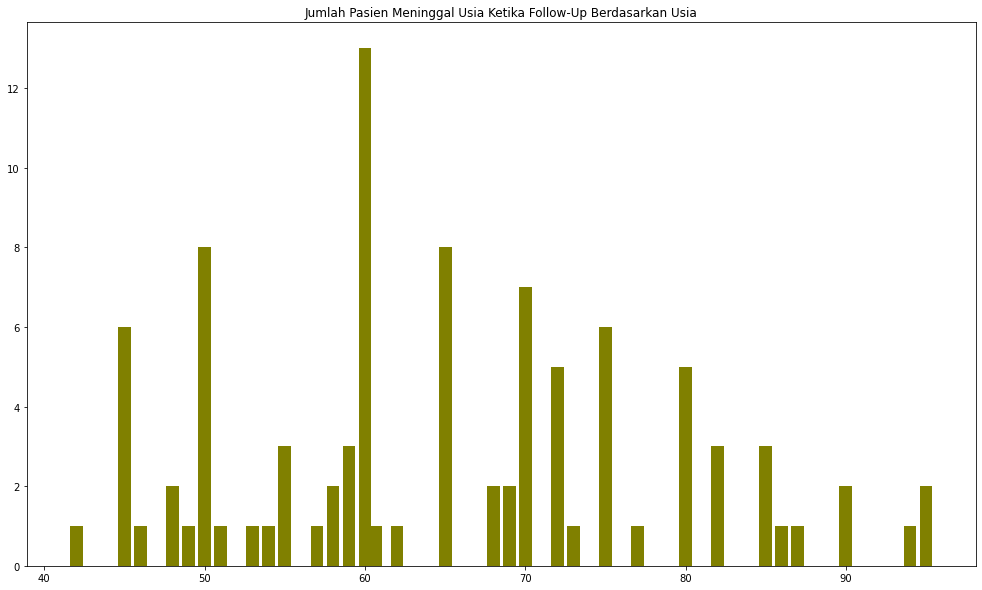

In [20]:
# variabel yang akan digunakan pada plot
x = data_usia['Usia']
y1 = data_usia['Meninggal']
y2 = data_usia['Tidak_Meninggal']

# inisiasi plot
plt.figure(figsize=(17,10))
plt.bar(x, y1, color='olive')

# membuat judul pada plot
plt.title('Jumlah Pasien Meninggal Usia Ketika Follow-Up Berdasarkan Usia')

# menampilkan plot
plt.show()

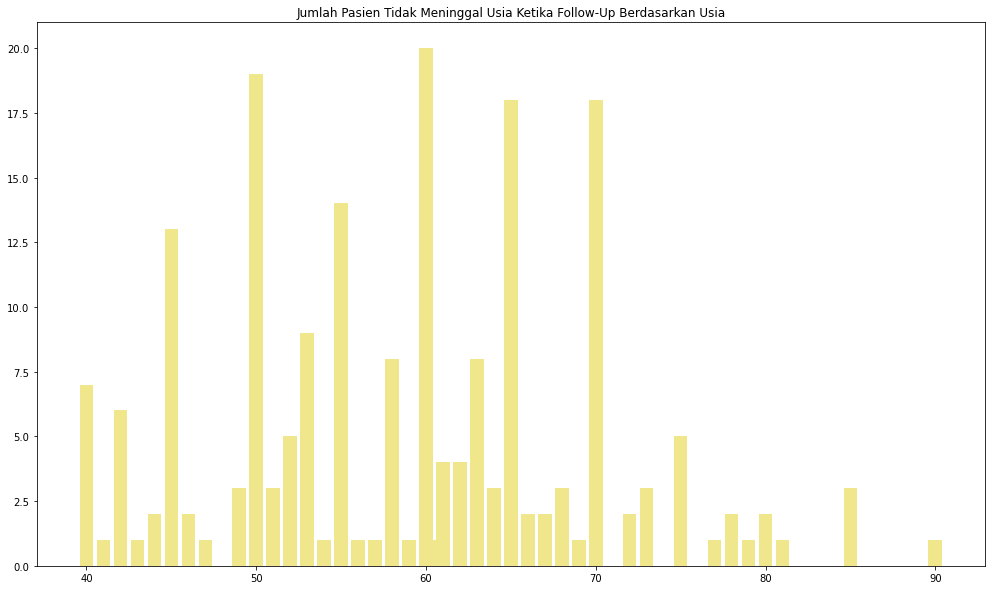

In [21]:
# variabel yang akan digunakan pada plot
x = data_usia['Usia']
y1 = data_usia['Meninggal']
y2 = data_usia['Tidak_Meninggal']

# inisiasi plot
plt.figure(figsize=(17,10))
plt.bar(x, y2, color='khaki')

# membuat judul pada plot
plt.title('Jumlah Pasien Tidak Meninggal Usia Ketika Follow-Up Berdasarkan Usia')

# menampilkan plot
plt.show()

<b>Kesimpulan</b>

Berdasarkan plot diatas, dapat disimpulkan bahwa kemungkinan pasien sudah meninggal ketika follow-up paling banyak terjadi pada pasien usia 60 tahun, dengan jumlah mencapai 13 pasien. Namun, jumlah pasien yang tidak meninggal ketika follow-up juga paling banyak dialami oleh pasien usia 60 tahun yang berjumlah sebanyak 20 pasien. Jumlah pasien meninggal pada pasien usia 50 dan 65 memiliki jumlah yang sama.

#### Kematian Berdasarkan Anemia, Diabetes, dan Hipertensi

In [22]:
# Melihat jumlah penderita anemia
anemia=len(data_copy[data_copy['Anemia']==1])
tidak_anemia=len(data_copy[data_copy['Anemia']==0])

# Melihat jumlah penderita diabetes
diabetes=len(data_copy[data_copy['Diabetes']==1])
tidak_diabetes=len(data_copy[data_copy['Diabetes']==0])

# Melihat jumlah penderita hipertensi
hipertensi=len(data_copy[data_copy['Hipertensi']==1])
tidak_hipertensi=len(data_copy[data_copy['Hipertensi']==0])

# Membuat dataframe dari jumlah penderita diabetes, anemia, dan hipertensi
data_ADH=pd.DataFrame(
    {'keterangan':['Anemia','Diabetes','Hipertensi'],
     'no':[tidak_anemia,tidak_diabetes,tidak_hipertensi],
    'yes':[anemia,diabetes,hipertensi],
    })
data_ADH=data_ADH.set_index('keterangan')
data_ADH

,no,yes
keterangan,,
Anemia,170,129
Diabetes,174,125
Hipertensi,194,105


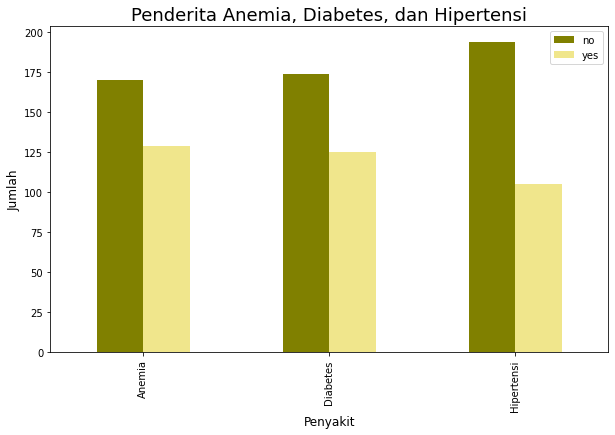

In [23]:
# Membuat visualisasi jumlah penderita anemia, diabetes, hipertensi
data_ADH.plot(kind='bar', figsize=(10,6),
                  color=['olive','khaki'])
plt.title('Penderita Anemia, Diabetes, dan Hipertensi', fontsize=18)
plt.xlabel('Penyakit', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

plt.show()

<b>Kesimpulan:</b>
Dilihat dari plot diketahui bahwa hampir 50% pasien penyakit jantung memiliki riwayat penyakit anemia, diikuti diabetes dan hipertensi.

In [24]:
penyakit_bawaan = ['Anemia','Diabetes','Hipertensi','Kematian']

data_penyakit = data_copy[penyakit_bawaan]
data_penyakit.head(1)

,Anemia,Diabetes,Hipertensi,Kematian
0,0,0,1,1


In [25]:
# Melihat pasien yang memiliki riwayat anemia, diabetes atau hipertensi
for col in data_penyakit.columns: 
    if col != 'Kematian':
        pasien = data_penyakit.loc[data_penyakit[col]==1]
        meninggal = len(pasien[pasien['Kematian']==1])
        tidak_meninggal = len(pasien[pasien['Kematian']==0])
        print('Pasien pengidap', col)
        print('Meninggal :', meninggal)
        print('Tidak Meninggal :', tidak_meninggal)
        print('\n','#'*60,'\n')

Pasien pengidap Anemia
Meninggal : 46
Tidak Meninggal : 83

 ############################################################ 

Pasien pengidap Diabetes
Meninggal : 40
Tidak Meninggal : 85

 ############################################################ 

Pasien pengidap Hipertensi
Meninggal : 39
Tidak Meninggal : 66

 ############################################################ 



In [26]:
# Melihat pasien yang memiliki riwayat anemia & diabetes, anemia & hipertensi, atau hipertensi & diabetes
for i in data_penyakit.columns:
    for j in data_penyakit.columns:
        if i != 'Kematian':
            if j != 'Kematian':
                if  i != j:
                    pasien = data_penyakit[(data_penyakit[i]==1) & (data_penyakit[j]==1)]
                    meninggal = len(pasien[pasien['Kematian']==1])
                    tidak_meninggal = len(pasien[pasien['Kematian']==0])
                    print('Pasien pengidap', i, j)
                    print('Meninggal :', meninggal)
                    print('Tidak Meninggal :', tidak_meninggal)
                    print('\n','#'*60,'\n')

Pasien pengidap Anemia Diabetes
Meninggal : 18
Tidak Meninggal : 35

 ############################################################ 

Pasien pengidap Anemia Hipertensi
Meninggal : 19
Tidak Meninggal : 29

 ############################################################ 

Pasien pengidap Diabetes Anemia
Meninggal : 18
Tidak Meninggal : 35

 ############################################################ 

Pasien pengidap Diabetes Hipertensi
Meninggal : 17
Tidak Meninggal : 26

 ############################################################ 

Pasien pengidap Hipertensi Anemia
Meninggal : 19
Tidak Meninggal : 29

 ############################################################ 

Pasien pengidap Hipertensi Diabetes
Meninggal : 17
Tidak Meninggal : 26

 ############################################################ 



In [27]:
# Melihat pasien yang memiliki riwayat anemia, diabetes, dan hipertensi
data_ADH=data_copy.loc[(data_copy['Anemia']==1) & (data_copy['Diabetes']==1) & (data_copy['Hipertensi']==1)]
meninggal_ADH=len(data_ADH[data_ADH['Kematian']==1])
tidak_meninggal_ADH=len(data_ADH[data_ADH['Kematian']==0])
print('Meninggal :',meninggal_ADH)
print('Tidak meninggal :', tidak_meninggal_ADH)

Meninggal : 6
Tidak meninggal : 11


#### Kematian Berdasarkan Gender

In [28]:
# Melihat Jumlah yang meninggal dan tidak meninggal berdasarkan gender
perempuan=data_copy[data_copy['Gender']==0]
laki2=data_copy[data_copy['Gender']==1]
laki2_meninggal=len(laki2[laki2['Kematian']==1])
perempuan_meninggal=len(perempuan[perempuan['Kematian']==1])
laki2_tidak_meninggal=len(laki2[laki2['Kematian']==0])
perempuan_tidak_meninggal=len(perempuan[perempuan['Kematian']==0])

# Membuat dataframe baru untuk kematian berdasarkan gender
data_kematian_gender=pd.DataFrame({'Keterangan':['Pasien Laki-Laki yang Meninggal',
                                           'Pasien Perempuan yang Meninggal',
                                           'Pasien Laki-Laki yang Tidak Meninggal',
                                           'Pasien Perempuan yang Tidak Meninggal'],
                             'Number': [laki2_meninggal,perempuan_meninggal,
                                       laki2_tidak_meninggal,perempuan_tidak_meninggal]})
data_kematian_gender=data_kematian_gender.set_index('Keterangan')
data_kematian_gender

,Number
Keterangan,
Pasien Laki-Laki yang Meninggal,62
Pasien Perempuan yang Meninggal,34
Pasien Laki-Laki yang Tidak Meninggal,132
Pasien Perempuan yang Tidak Meninggal,71


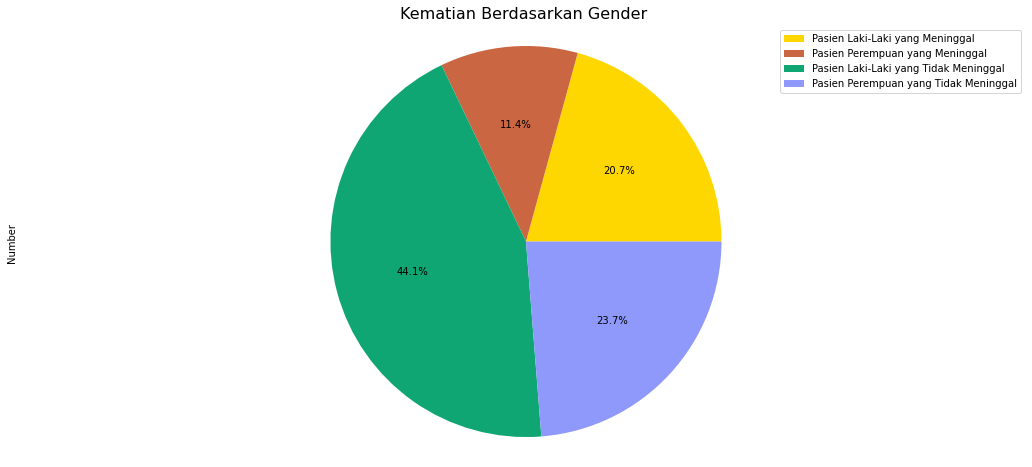

In [29]:
# Membuat pie chart dari data kematian berdasar gender
color_list=['gold','#ca6641','#10a674','#8f99fb']
data_kematian_gender['Number'].plot(kind='pie', figsize=(18,8),
                               autopct='%1.1f%%',
                                colors=color_list,labels=None)
plt.title('Kematian Berdasarkan Gender', fontsize=16)
plt.axis('equal')
plt.legend(labels=data_kematian_gender.index)

Dilihat dari pie chart diketahui bahwa sebesar 44,1% laki-laki mampu bertahan dan sebesar 23,7 perempuan mampu bertahan, sedangkan sebesar 20,7% laki-laki tidak mampu bertahan (meninggal) dan sebesar 11,4% perempuan tidak mampu bertahan (meninggal).
Maka dapat disimpulkan terdapat lebih banyak pasien laki-laki yang terkena penyakit jantung dibandingkan pasien perempuan dan terdapat lebih banyak pasien laki-laki yang meninggal karena penyakit jantung dibandingankan pasien perempuan.

#### Kematian Berdasarkan Perokok

In [30]:
# Melihat jumlah kematian berdasarkan merokok atau tidak
data_kematian_perokok=data_copy.groupby(['Perokok','Kematian'])['Kematian'].count().unstack()
data_kematian_perokok

Kematian,0,1
Perokok,,
0,137,66
1,66,30


In [31]:
tidak_meninggal=data_copy[data_copy['Kematian']==0]
meninggal=data_copy[data_copy['Kematian']==1]
tidak_meninggal_perokok=len(tidak_meninggal[tidak_meninggal['Perokok']==1])
meninggal_perokok=len(meninggal[meninggal['Perokok']==1])
tidak_meninggal_bukan_perokok=len(tidak_meninggal[tidak_meninggal['Perokok']==0])
meninggal_bukan_perokok=len(meninggal[meninggal['Perokok']==0])

# Membuat dataframe baru untuk kematian berdasarkan merokok atau tidak
data_kematian_perokok2=pd.DataFrame({'keterangan':['Pasien Perokok yang Tidak Meninggal','Pasien Perokok yang Meninggal',
                                                   'Pasien Bukan Perokok yang Tidak Meninggal','Pasien Bukan Perokok yang Meninggal'],
                                'Number':[tidak_meninggal_perokok,meninggal_perokok,tidak_meninggal_bukan_perokok,meninggal_bukan_perokok]})
data_kematian_perokok2=data_kematian_perokok2.set_index('keterangan')
data_kematian_perokok2

,Number
keterangan,
Pasien Perokok yang Tidak Meninggal,66
Pasien Perokok yang Meninggal,30
Pasien Bukan Perokok yang Tidak Meninggal,137
Pasien Bukan Perokok yang Meninggal,66


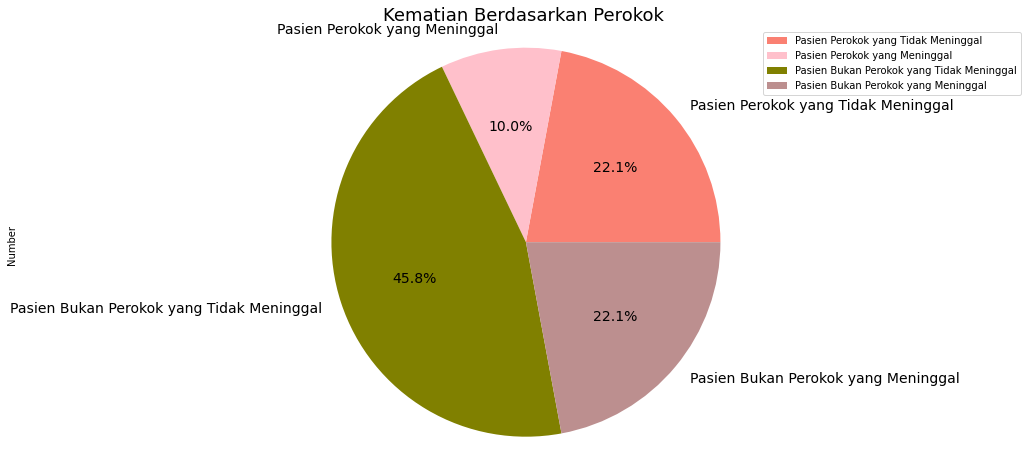

In [32]:
# Membuat pie chart
color_list2=['salmon','pink','olive','rosybrown']
data_kematian_perokok2['Number'].plot(kind='pie',
                                  figsize=(18,8),autopct='%1.1f%%',
                                 colors=color_list2,
                                 fontsize=14)
plt.title('Kematian Berdasarkan Perokok', fontsize=18)
plt.axis('equal')
plt.legend(labels=data_kematian_perokok2.index)

Dilihat dari pie chart diketahui bahwa sebesar 45,8% orang yang bukan perokok tidak meninggal dan sebesar 22,1% orang yang perokok tidak meninggal, sedangkan sebesar 10% orang yang perokok meninggal dan sebesar 22,1% orang yang bukan perokok meninggal.
Maka dapat disimpulkan bahwa lebih banyak orang yang bukan perokok mampu bertahan, namum perokok tidak bisa dikatakan sebagai penyebab utama kematian pada penderita jantung.

## Correlation

<AxesSubplot:>

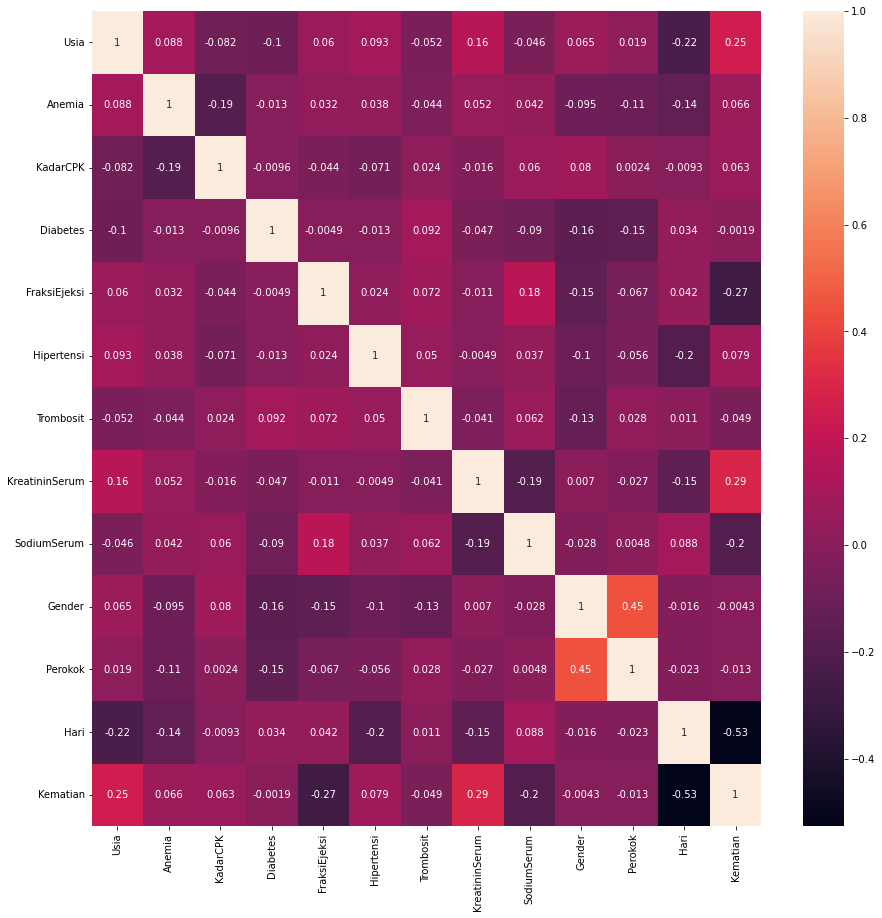

In [33]:
#melihat korelasi antar fitur
plt.figure(figsize=(15,15))
sns.heatmap(data_copy.corr(), annot=True)

<b> Kesimpulan : </b>\
Dari <i>heatmap</i> di atas, terlihat nilai korelasi antar fitur dan antara fitur dengan target.  Selanjutnya, akan dilihat nilai korelasi antara data fitur dengan data target.  Fitur yang memiliki nilai korelasi terbesar dengan data target adalah fitur hari, lalu diikuti oleh KreatininSerum, FraksiEjeksi, dan Usia.  Sedangkan untuk fitur lainnya, nilai korelasi dengan data target sangat kecil.  Bahkan, berada di bawah 0.1.

## Data Preprocessing

### Pemeriksaan Outlier

In [34]:
col_num = ['Usia','KadarCPK','FraksiEjeksi','Trombosit','KreatininSerum','SodiumSerum']

data_num = data_copy[col_num]
data_num.shape

(299, 6)

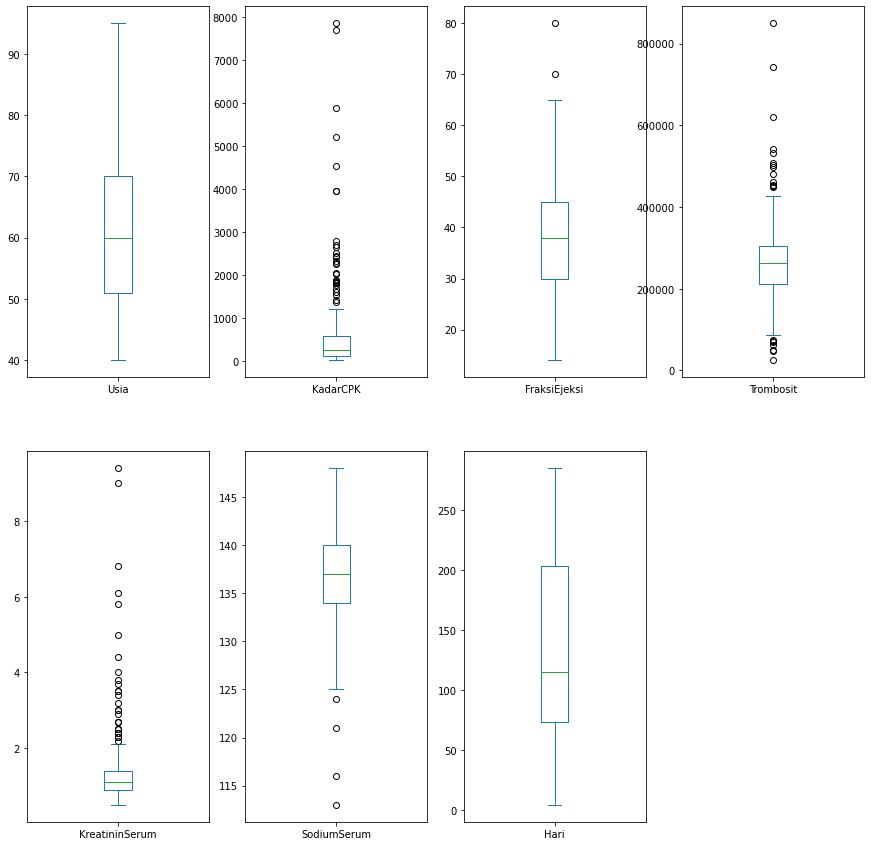

In [35]:
# Melihat sebaran data masing-masing fitur numerik dengan boxplot
fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(2,4,1)
ax2=fig.add_subplot(2,4,2)
ax3=fig.add_subplot(2,4,3)
ax4=fig.add_subplot(2,4,4)
ax5=fig.add_subplot(2,4,5)
ax6=fig.add_subplot(2,4,6)
ax7=fig.add_subplot(2,4,7)
# Membuat boxplot masing-masing fitur numerik
data_copy['Usia'].plot(kind='box', ax=ax1)
data_copy['KadarCPK'].plot(kind='box', ax=ax2)
data_copy['FraksiEjeksi'].plot(kind='box', ax=ax3)
data_copy['Trombosit'].plot(kind='box', ax=ax4)
data_copy['KreatininSerum'].plot(kind='box', ax=ax5)
data_copy['SodiumSerum'].plot(kind='box', ax=ax6)
data_copy['Hari'].plot(kind='box', ax=ax7)
plt.show()

In [36]:
for col in data_num.columns:
    Q1 = data_num[col].quantile(0.25)
    Q3 = data_num[col].quantile(0.75)
    IQR = 1.5*(Q3-Q1)
    Low = Q1-IQR
    High = Q3+IQR
    print('Batas Bawah',[col],':', Low)
    print('Batas Atas',[col],':', High)
    print('Banyaknya Outlier',[col],':',len(data_num[(data_num[col]<Low) | (data_num[col]>High)]))
    print('\n','#'*60,'\n')

Batas Bawah ['Usia'] : 22.5
Batas Atas ['Usia'] : 98.5
Banyaknya Outlier ['Usia'] : 0

 ############################################################ 

Batas Bawah ['KadarCPK'] : -581.75
Batas Atas ['KadarCPK'] : 1280.25
Banyaknya Outlier ['KadarCPK'] : 29

 ############################################################ 

Batas Bawah ['FraksiEjeksi'] : 7.5
Batas Atas ['FraksiEjeksi'] : 67.5
Banyaknya Outlier ['FraksiEjeksi'] : 2

 ############################################################ 

Batas Bawah ['Trombosit'] : 76000.0
Batas Atas ['Trombosit'] : 440000.0
Banyaknya Outlier ['Trombosit'] : 21

 ############################################################ 

Batas Bawah ['KreatininSerum'] : 0.15000000000000024
Batas Atas ['KreatininSerum'] : 2.1499999999999995
Banyaknya Outlier ['KreatininSerum'] : 29

 ############################################################ 

Batas Bawah ['SodiumSerum'] : 125.0
Batas Atas ['SodiumSerum'] : 149.0
Banyaknya Outlier ['SodiumSerum'] : 4

 #########

Dari boxplot dan perhitungan di atas terlihat bahwa terdapat outlier di hampir semua fitur numerik. Oleh karena itu, akan dihapus outlier yang ada di dataset.

In [37]:
# Membuat dataframe baru : data_copy
data_copy1 = data.copy()

# Menunjukkan 5 data teratas
data_copy1.head()

,Usia,Anemia,KadarCPK,Diabetes,FraksiEjeksi,Hipertensi,Trombosit,KreatininSerum,SodiumSerum,Gender,Perokok,Hari,Kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [38]:
col_num = ['Usia','KadarCPK','FraksiEjeksi','Trombosit','KreatininSerum','SodiumSerum']

data_num1 = data_copy1[col_num]
data_num1.shape

(299, 6)

In [39]:
for col in data_num1.columns:
    Q1 = data_num1[col].quantile(0.25)
    Q3 = data_num1[col].quantile(0.75)
    IQR = 1.5*(Q3-Q1)
    Low = Q1-IQR
    High = Q3+IQR
    data_copy1=data_copy1[~((data_copy1[col]<Low) | (data_copy1[col]>High))]

In [40]:
data_copy1.shape

(224, 13)

In [41]:
data_copy1.head()

,Usia,Anemia,KadarCPK,Diabetes,FraksiEjeksi,Hipertensi,Trombosit,KreatininSerum,SodiumSerum,Gender,Perokok,Hari,Kematian
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1


In [42]:
data_copy1[data_copy1['Kematian']==0].shape

(163, 13)

### Splitting Data

In [43]:
# Memisahkan variabel independen dan dependen
X = data_copy1.drop(columns='Kematian')
y = data_copy1['Kematian']

In [44]:
# Membagi data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [45]:
# Melihat jumlah data training dan data testing
print(X_train.shape)
print(X_test.shape)

(156, 12)
(68, 12)


In [46]:
# melihat jumlah baris dan kolom dari data
data_copy1.shape

(224, 13)

Dari 244 data, data dibagi menjadi 2 untuk dijadikan data training dan data testing dengan proporsi data training sebesar 70% atau sejumlah 156 data dan data testing sebesar 30% atau sejumlah 68 data.

## Modelling

### Defining Model

#### Random Forest Classifier

In [47]:
model_rf = RandomForestClassifier(n_estimators=100)

#### Gradient Booster Classifier

In [48]:
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=3)

#### AdaBoost Classifier

In [49]:
model_ab = AdaBoostClassifier(n_estimators=100, learning_rate = 0.1)

### Model Evaluation

#### Random Forest Classifier

In [50]:
# Training Model
model_rf.fit(X_train, y_train)

# Testing Model
y_pred1 = model_rf.predict(X_test)

# Evaluasi model
confusion_matrix(y_test,y_pred1)

print(classification_report(y_test,y_pred1))

#Ringkasan Evaluasi Model Random Forest Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model Random Forest Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test, y_pred1),4),normal)
print('Presisi :', bold,round(precision_score(y_test,y_pred1),4),normal)
print('Recall :', bold,round(recall_score(y_test,y_pred1),4),normal)
print('F1 Score :', bold,round(f1_score(y_test,y_pred1),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        50
           1       0.92      0.67      0.77        18

    accuracy                           0.90        68
   macro avg       0.91      0.82      0.85        68
weighted avg       0.90      0.90      0.89        68

 Ringkasan Evaluasi Model Random Forest Classifier 
Akurasi :  0.8971 
Presisi :  0.9231 
Recall :  0.6667 
F1 Score :  0.7742 


<AxesSubplot:>

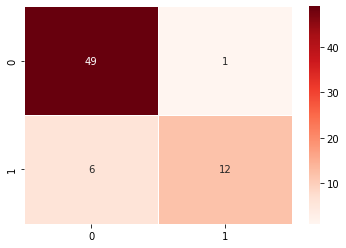

In [51]:
cm1 = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm1, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

#### Gradient Booster Classifier

In [52]:
# Training Model
model_gb.fit(X_train, y_train)

# Testing Model
y_pred2 = model_gb.predict(X_test)

# Evaluasi model
confusion_matrix(y_test,y_pred2)

print(classification_report(y_test,y_pred2))

#Ringkasan Evaluasi Model Random Forest Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model Gradient Booster Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test, y_pred2),4),normal)
print('Presisi :', bold,round(precision_score(y_test,y_pred2),4),normal)
print('Recall :', bold,round(recall_score(y_test,y_pred2),4),normal)
print('F1 Score :', bold,round(f1_score(y_test,y_pred2),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        50
           1       0.80      0.67      0.73        18

    accuracy                           0.87        68
   macro avg       0.84      0.80      0.82        68
weighted avg       0.86      0.87      0.86        68

 Ringkasan Evaluasi Model Gradient Booster Classifier 
Akurasi :  0.8676 
Presisi :  0.8 
Recall :  0.6667 
F1 Score :  0.7273 


<AxesSubplot:>

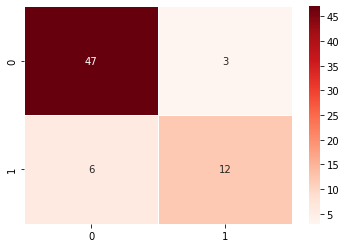

In [53]:
cm2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm2, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

#### AdaBoost Classifier

In [54]:
# Training Model
model_ab.fit(X_train, y_train)
# Testing Model
y_pred3 = model_ab.predict(X_test)

# Evaluasi model
confusion_matrix(y_test,y_pred3)

print(classification_report(y_test,y_pred3))

#Ringkasan Evaluasi Model Random Forest Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model AdaBoost Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test, y_pred3),4),normal)
print('Presisi :', bold,round(precision_score(y_test,y_pred3),4),normal)
print('Recall :', bold,round(recall_score(y_test,y_pred3),4),normal)
print('F1 Score :', bold,round(f1_score(y_test,y_pred3),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        50
           1       0.80      0.44      0.57        18

    accuracy                           0.82        68
   macro avg       0.81      0.70      0.73        68
weighted avg       0.82      0.82      0.80        68

 Ringkasan Evaluasi Model AdaBoost Classifier 
Akurasi :  0.8235 
Presisi :  0.8 
Recall :  0.4444 
F1 Score :  0.5714 


<AxesSubplot:>

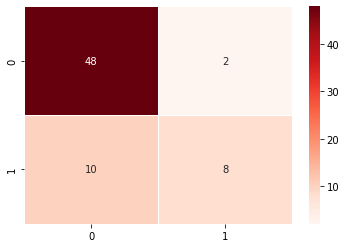

In [55]:
cm3 = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm3, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

Selanjutnya, akan dilakukan metode SMOTE untuk mengatasi masalah imbalanced data.  Terlihat bahwa proporsi antara jumlah data kelas 0 dan kelas 1 pada data target jauh berbeda.  Jumlah data kelas 0 berjumlah 163 sedangkan jumlah data kelas 1 berjumlah 61.

### Modelling Using SMOTE

In [56]:
smote_method = SMOTE()
X_s, y_s = smote_method.fit_resample(X, y)

In [57]:
# Splitting data
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, stratify = y_s, test_size=0.3, random_state=0)

In [58]:
# Melihat jumlah data training dan data testing
print(X_train_s.shape)
print(X_test_s.shape)

(228, 12)
(98, 12)


## Modelling

### Defining Model

#### Random Forest Classifier

In [59]:
model_rf_s = RandomForestClassifier(n_estimators=100)

#### Gradient Booster Classifier

In [60]:
model_gb_s = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=3)

#### AdaBoost Classifier

In [61]:
model_ab_s = AdaBoostClassifier(n_estimators=100, learning_rate = 0.1)

### Model Evaluation

#### Random Forest Classifier

In [62]:
# Training Model
model_rf_s.fit(X_train_s, y_train_s)

# Testing Model
y_pred1_s = model_rf_s.predict(X_test_s)

# Evaluasi model
confusion_matrix(y_test_s,y_pred1_s)

print(classification_report(y_test_s,y_pred1_s))

#Ringkasan Evaluasi Model Random Forest Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model Random Forest Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test_s, y_pred1_s),4),normal)
print('Presisi :', bold,round(precision_score(y_test_s,y_pred1_s),4),normal)
print('Recall :', bold,round(recall_score(y_test_s,y_pred1_s),4),normal)
print('F1 Score :', bold,round(f1_score(y_test_s,y_pred1_s),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        49
           1       0.90      0.90      0.90        49

    accuracy                           0.90        98
   macro avg       0.90      0.90      0.90        98
weighted avg       0.90      0.90      0.90        98

 Ringkasan Evaluasi Model Random Forest Classifier 
Akurasi :  0.898 
Presisi :  0.898 
Recall :  0.898 
F1 Score :  0.898 


<AxesSubplot:>

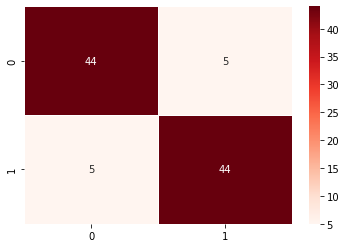

In [63]:
cm1_s = confusion_matrix(y_test_s, y_pred1_s)
sns.heatmap(cm1_s, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

#### Gradient Booster Classifier

In [64]:
# Training Model
model_gb_s.fit(X_train_s, y_train_s)

# Testing Model
y_pred2_s = model_gb_s.predict(X_test_s)

# Evaluasi model
confusion_matrix(y_test_s,y_pred2_s)

print(classification_report(y_test_s,y_pred2_s))

#Ringkasan Evaluasi Model Random Forest Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model Gradient Booster Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test_s,y_pred2_s),4),normal)
print('Presisi :', bold,round(precision_score(y_test_s,y_pred2_s),4),normal)
print('Recall :', bold,round(recall_score(y_test_s,y_pred2_s),4),normal)
print('F1 Score :', bold,round(f1_score(y_test_s,y_pred2_s),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        49
           1       0.84      0.84      0.84        49

    accuracy                           0.84        98
   macro avg       0.84      0.84      0.84        98
weighted avg       0.84      0.84      0.84        98

 Ringkasan Evaluasi Model Gradient Booster Classifier 
Akurasi :  0.8367 
Presisi :  0.8367 
Recall :  0.8367 
F1 Score :  0.8367 


<AxesSubplot:>

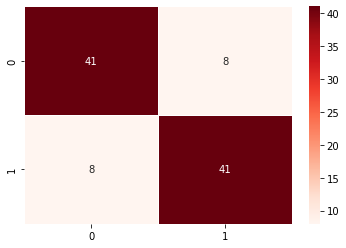

In [65]:
cm2_s = confusion_matrix(y_test_s, y_pred2_s)
sns.heatmap(cm2_s, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

#### AdaBoost Classifier

In [66]:
# Training Model
model_ab_s.fit(X_train_s, y_train_s)

# Testing Model
y_pred3_s = model_ab.predict(X_test_s)

# Evaluasi model
confusion_matrix(y_test_s,y_pred3_s)

print(classification_report(y_test_s,y_pred3_s))

#Ringkasan Evaluasi Model Random Forest Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model AdaBoost Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test_s,y_pred3_s),4),normal)
print('Presisi :', bold,round(precision_score(y_test_s,y_pred3_s),4),normal)
print('Recall :', bold,round(recall_score(y_test_s,y_pred3_s),4),normal)
print('F1 Score :', bold,round(f1_score(y_test_s,y_pred3_s),4),normal)
print("=============================================================")

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        49
           1       0.91      0.61      0.73        49

    accuracy                           0.78        98
   macro avg       0.81      0.78      0.77        98
weighted avg       0.81      0.78      0.77        98

 Ringkasan Evaluasi Model AdaBoost Classifier 
Akurasi :  0.7755 
Presisi :  0.9091 
Recall :  0.6122 
F1 Score :  0.7317 


<AxesSubplot:>

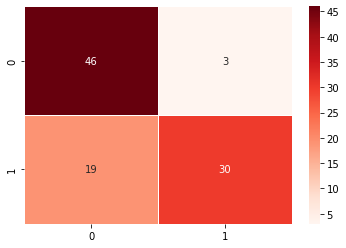

In [67]:
cm3_s = confusion_matrix(y_test_s,y_pred3_s)
sns.heatmap(cm3_s, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

Terlihat bahwa setelah dilakukan SMOTE, terjadi peningkatan akurasi hanya pada algoritma Random Forest.  Bahkan algoritma Random Forest dengan penambahan metode SMOTE untuk mengatasi permasalahan imbalanced data, memiliki  nilai akurasi tertinggi daripada algoritma-algoritma yang lain.  Nilai akurasinya sebesar 0.92.  Oleh karena itu, algoritma Random Forest dengan SMOTE merupakan algoritma terbaik dalam melakukan klasifikasi dataset ini.

#### Save Model

In [68]:
# Menyimpan model_lr untuk digunakan dalam deployment
pickle.dump(model_rf_s,open('model_rf_s.pkl','wb'))

## Inference Model

In [69]:
#prediksi hujan dengan input diluar dataset
Hari=float(input('Berapa hari yang dibutuhkan pasien untuk follow-up? '))
Usia=float(input('Usia pasien: '))
SerumCreatinine=float(input('Level serum creatinine di darah (mg/dL) (Umumnya 0.7-1.3 mg/dL untuk pria dan 0.6-1.1 mg/dL untuk wanita): '))
EjectionFraction=float(input('Fraksi ejeksi (%) (Nilai normal >50%): '))
SerumSodium=float(input('Level serum sodium di darah (mEq/L) (Normalnya berkisar antara 135-145 mEq/L): '))
CreatininePhosphokinase=input('Level enzim CPK (mcg/L) (Normalnya 39-308 mcg/L untuk pria dan 26-192 mcg/L untuk wanita): ')
Platelets=float(input('Jumlah trombosit di darah (kiloplatelets/mL): '))
Gender=input('Gender pasien (pria/wanita) ')
Anemia=input('Apakah pasien mengidap anemia? (ya/tidak) ')
Diabetes=input('Apakah pasien mengidap diabetes? (ya/tidak) ')
DarahTinggi=input('Apakah tekanan darah pasien tinggi? (ya/tidak) ')
Merokok=input('Apakah pasien merokok? (ya/tidak) ')
features=[Hari,Usia,SerumCreatinine,EjectionFraction,SerumSodium,
          CreatininePhosphokinase,Platelets]  

if Gender=='pria':
    features.append(1)
elif Gender=='wanita':
    features.append(0)
    
if Anemia=='ya':
    features.append(1)
elif Anemia=='tidak':
    features.append(0)

if Diabetes=='ya':
    features.append(1)
elif Diabetes=='tidak':
    features.append(0)
    
if DarahTinggi=='ya':
    features.append(1)
elif DarahTinggi=='tidak':
    features.append(0)
    
if Merokok=='ya':
    features.append(1)
elif Merokok=='tidak':
    features.append(0)
    
pred=model_rf.predict([features])

if pred==1:
    prediction='Meninggal'
elif pred==0:
    prediction='Tidak meninggal'
print('Diprediksi pasien',prediction)

Berapa hari yang dibutuhkan pasien untuk follow-up? 12
Usia pasien: 60
Level serum creatinine di darah (mg/dL) (Umumnya 0.7-1.3 mg/dL untuk pria dan 0.6-1.1 mg/dL untuk wanita): 1
Fraksi ejeksi (%) (Nilai normal >50%): 40
Level serum sodium di darah (mEq/L) (Normalnya berkisar antara 135-145 mEq/L): 2
Level enzim CPK (mcg/L) (Normalnya 39-308 mcg/L untuk pria dan 26-192 mcg/L untuk wanita): 12
Jumlah trombosit di darah (kiloplatelets/mL): 4
Gender pasien (pria/wanita) pria
Apakah pasien mengidap anemia? (ya/tidak) ya
Apakah pasien mengidap diabetes? (ya/tidak) tidak
Apakah tekanan darah pasien tinggi? (ya/tidak) ya
Apakah pasien merokok? (ya/tidak) ya
Diprediksi pasien Meninggal


## Kesimpulan

Berdasarkan analisis yang telah dilakukan, terdapat beberapa kesimpulan, sebagai berikut:
- Pada dataset terdapat 12 fitur yang dipekirakan dapat mempengaruhi kematian pada pasien penderita penyakit jantung.
- Dalam rentang usia 40-95 tahun, pasien berusia 60 tahun paling banyak mengalami kasus kematian dengan jumlah pasian sebanyak 13.  Akan tetapi, pasien berusia 60 tahun juga ialah usia yang paling banyak bertahan (tidak meninggal) dengan jumlah 20 pasien.
- Psien penyakit jantung yang mengalami kematian dengan penyakit bawaan anemia berjumlah 129 pasien diikuti diabetes berjumlah 125 pasien dan hipertensi dengan 105 pasien. 
- Berdasarkan gender, pasien penyakit jantung paling banyak diderita oleh laki-laki dan juga jumlah pasien yang meninggal juga didominasi laki-laki.
- Berdasarkan riwayat merokok, pasien penyakit jantung yang mengalami kematian bukanlah pasien yang merokok.  Akan tetapi, jumlah pasien penyakit jantung yang merokok dan mengalami kematian juga terhitung banyak.  Bahkan melebihi angka 30 atau setengah dari total pasien yang meninggal.
- Menggunakan metode SMOTE untuk mengatasi masalah imbalanced data.
- Model yang digunakan untuk klasifikasi yaitu model Random Forest, model Gradient Booster, dan model AdaBoost.
- Setelah melihat nilai akurasi antara Random Forest, Gradient Booster, dan Adaboost maka model yang dipilih adalah model Random Forest karena untuk nilai akurasi, presisi, dan F1 Score model Random Forest sedikit lebih unggul dibandingkan model model Gradient Booster dan model Adaboost.
- Model Random Forest memiliki nilai akurasi sebesar 92% yang mana hasil tersebut cukup baik untuk dilakukan klasifikasi keselamatan pasien penyakit jantung.